In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [8]:
test = pd.read_csv("/users/nishantmahajan/downloads/test.csv")

In [9]:
train = pd.read_csv("/users/nishantmahajan/downloads/train.csv")

In [10]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [12]:
train.head(10).T

,0,1,2,3,4,5,6,7,8,9
Id,1,2,3,4,5,6,7,8,9,10
MSSubClass,60,20,60,70,60,50,20,60,50,190
MSZoning,RL,RL,RL,RL,RL,RL,RL,RL,RM,RL
LotFrontage,65,80,68,60,84,85,75,NaN,51,50
LotArea,8450,9600,11250,9550,14260,14115,10084,10382,6120,7420
...,...,...,...,...,...,...,...,...,...,...
MoSold,2,5,9,2,12,10,8,11,4,1
YrSold,2008,2007,2008,2006,2008,2009,2007,2009,2008,2008
SaleType,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD
SaleCondition,Normal,Normal,Normal,Abnorml,Normal,Normal,Normal,Normal,Abnorml,Normal


In [13]:
train.shape

(1460, 81)

In [14]:
test.shape

(1459, 80)

In [15]:
test.head().T

,0,1,2,3,4
Id,1461,1462,1463,1464,1465
MSSubClass,20,20,60,60,120
MSZoning,RH,RL,RL,RL,RL
LotFrontage,80,81,74,78,43
LotArea,11622,14267,13830,9978,5005
...,...,...,...,...,...
MiscVal,0,12500,0,0,0
MoSold,6,6,3,6,1
YrSold,2010,2010,2010,2010,2010
SaleType,WD,WD,WD,WD,WD


In [17]:
print(train.shape,test.shape)

(1460, 81) (1459, 80)


In [21]:
df=test.append(train,ignore_index=True)

In [22]:
df.shape

(2919, 81)

In [24]:
df.head().T

,0,1,2,3,4
1stFlrSF,896,1329,928,926,1280
2ndFlrSF,0,0,701,678,0
3SsnPorch,0,0,0,0,0
Alley,NaN,NaN,NaN,NaN,NaN
BedroomAbvGr,2,3,3,3,2
...,...,...,...,...,...
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub
WoodDeckSF,140,393,212,360,0
YearBuilt,1961,1958,1997,1998,1992
YearRemodAdd,1961,1958,1998,1998,1992


##Data Cleaning

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      291

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
1stFlrSF,2919.0,1159.581706,392.362079,334.0,876.0,1082.0,1387.5,5095.0
2ndFlrSF,2919.0,336.483727,428.701456,0.0,0.0,0.0,704.0,2065.0
3SsnPorch,2919.0,2.602261,25.188169,0.0,0.0,0.0,0.0,508.0
BedroomAbvGr,2919.0,2.860226,0.822693,0.0,2.0,3.0,3.0,8.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0
BsmtFinSF2,2918.0,49.582248,169.205611,0.0,0.0,0.0,0.0,1526.0
BsmtFullBath,2917.0,0.429894,0.524736,0.0,0.0,0.0,1.0,3.0
BsmtHalfBath,2917.0,0.061364,0.245687,0.0,0.0,0.0,0.0,2.0
BsmtUnfSF,2918.0,560.772104,439.543659,0.0,220.0,467.0,805.5,2336.0
EnclosedPorch,2919.0,23.098321,64.244246,0.0,0.0,0.0,0.0,1012.0


In [30]:
df.isnull().sum()

1stFlrSF           0
2ndFlrSF           0
3SsnPorch          0
Alley           2721
BedroomAbvGr       0
                ... 
Utilities          2
WoodDeckSF         0
YearBuilt          0
YearRemodAdd       0
YrSold             0
Length: 81, dtype: int64

In [32]:
miss_val = pd.DataFrame(train.isnull().sum(axis=0).sort_values(ascending=False),columns=["Count"])

In [33]:
miss_val

,Count
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
...,...
CentralAir,0
SaleCondition,0
Heating,0
TotalBsmtSF,0


In [35]:
miss_val["percent"] = miss_val.Count.apply (lambda x : '{:.2f}'.format(float(x)/train.shape[0]*100))

In [36]:
miss_val

,Count,percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
...,...,...
CentralAir,0,0.00
SaleCondition,0,0.00
Heating,0,0.00
TotalBsmtSF,0,0.00


In [37]:
df.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'Po

In [38]:
df.drop(["PoolQC","MiscFeature","Alley","Fence","FireplaceQu","LotFrontage"],axis=1,inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 75 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      2918 non-null object
Exterior2nd      29

In [42]:
df.SalePrice = df.SalePrice.fillna(value=df.SalePrice.mean())

In [43]:
df.dropna(inplace=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 1459 to 2918
Data columns (total 75 columns):
1stFlrSF         1338 non-null int64
2ndFlrSF         1338 non-null int64
3SsnPorch        1338 non-null int64
BedroomAbvGr     1338 non-null int64
BldgType         1338 non-null object
BsmtCond         1338 non-null object
BsmtExposure     1338 non-null object
BsmtFinSF1       1338 non-null float64
BsmtFinSF2       1338 non-null float64
BsmtFinType1     1338 non-null object
BsmtFinType2     1338 non-null object
BsmtFullBath     1338 non-null float64
BsmtHalfBath     1338 non-null float64
BsmtQual         1338 non-null object
BsmtUnfSF        1338 non-null float64
CentralAir       1338 non-null object
Condition1       1338 non-null object
Condition2       1338 non-null object
Electrical       1338 non-null object
EnclosedPorch    1338 non-null int64
ExterCond        1338 non-null object
ExterQual        1338 non-null object
Exterior1st      1338 non-null object
Exterior2nd     

In [44]:
df.isnull().sum()

1stFlrSF        0
2ndFlrSF        0
3SsnPorch       0
BedroomAbvGr    0
BldgType        0
               ..
Utilities       0
WoodDeckSF      0
YearBuilt       0
YearRemodAdd    0
YrSold          0
Length: 75, dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 1459 to 2918
Data columns (total 75 columns):
1stFlrSF         1338 non-null int64
2ndFlrSF         1338 non-null int64
3SsnPorch        1338 non-null int64
BedroomAbvGr     1338 non-null int64
BldgType         1338 non-null object
BsmtCond         1338 non-null object
BsmtExposure     1338 non-null object
BsmtFinSF1       1338 non-null float64
BsmtFinSF2       1338 non-null float64
BsmtFinType1     1338 non-null object
BsmtFinType2     1338 non-null object
BsmtFullBath     1338 non-null float64
BsmtHalfBath     1338 non-null float64
BsmtQual         1338 non-null object
BsmtUnfSF        1338 non-null float64
CentralAir       1338 non-null object
Condition1       1338 non-null object
Condition2       1338 non-null object
Electrical       1338 non-null object
EnclosedPorch    1338 non-null int64
ExterCond        1338 non-null object
ExterQual        1338 non-null object
Exterior1st      1338 non-null object
Exterior2nd     

In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
1stFlrSF,1338.0,1176.221973,386.644986,438.0,894.00,1098.0,1414.00,4692.0
2ndFlrSF,1338.0,357.141256,440.324982,0.0,0.00,0.0,740.50,2065.0
3SsnPorch,1338.0,3.585949,30.224622,0.0,0.00,0.0,0.00,508.0
BedroomAbvGr,1338.0,2.864723,0.776677,0.0,2.00,3.0,3.00,6.0
BsmtFinSF1,1338.0,464.234679,458.792420,0.0,0.00,413.0,733.00,5644.0
BsmtFinSF2,1338.0,49.218236,166.196584,0.0,0.00,0.0,0.00,1474.0
BsmtFullBath,1338.0,0.438714,0.515630,0.0,0.00,0.0,1.00,2.0
BsmtHalfBath,1338.0,0.060538,0.241685,0.0,0.00,0.0,0.00,2.0
BsmtUnfSF,1338.0,582.494768,439.950528,0.0,248.00,489.0,815.75,2336.0
EnclosedPorch,1338.0,21.263827,60.843964,0.0,0.00,0.0,0.00,552.0


In [49]:
print ("Min value of the LotArea is: "),df.LotArea.min()

Min value of the LotArea is: 


(None, 1300)

In [50]:
print("Max value of the LotArea is: "),df.LotArea.max()

Max value of the LotArea is: 


(None, 215245)

In [51]:
print ("Max value of Saleprice is: "),df.SalePrice.max(),"Min value of Saleprice is: ",df.SalePrice.min()

Max value of Saleprice is: 


(None, 755000.0, 'Min value of Saleprice is: ', 35311.0)

In [52]:
print ("Mean value of the LotArea is: "),df.LotArea.mean()

Mean value of the LotArea is: 


(None, 10706.29446935725)

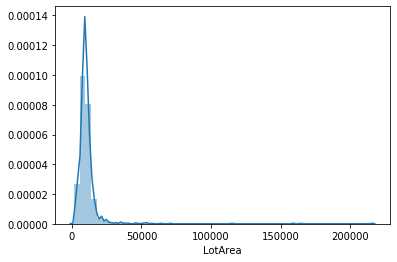

In [55]:
sns.distplot(df.LotArea)

In [56]:
df["LogofArea"] = np.log(df.LotArea)

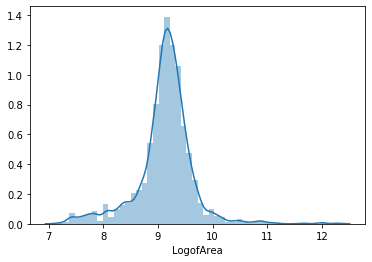

In [57]:
sns.distplot(df.LogofArea)

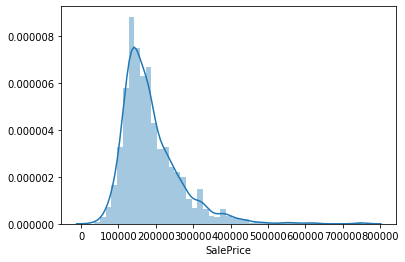

In [58]:
sns.distplot(df.SalePrice)

In [59]:
df["LogOfPrice"] = np.log(df.SalePrice)

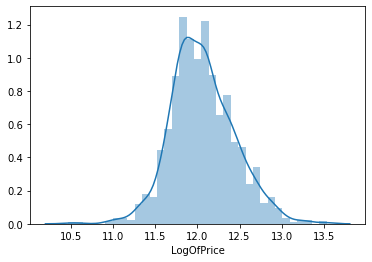

In [60]:
sns.distplot(df.LogOfPrice)

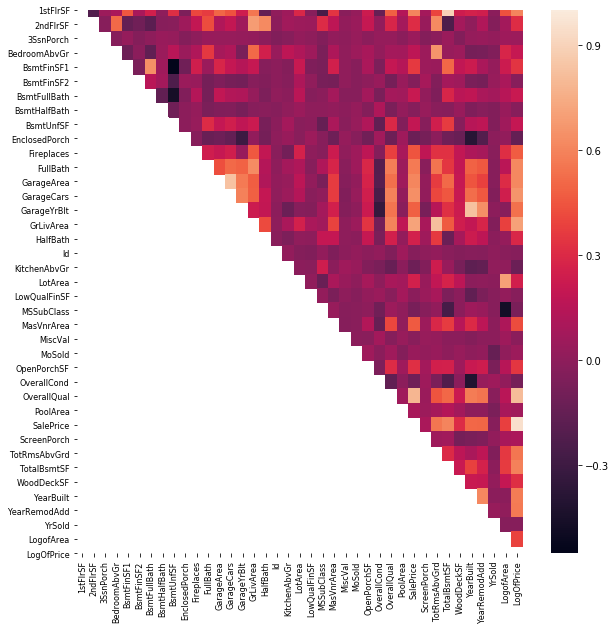

In [80]:
corrs = df.corr()

#Set the default matplotlib figure size 
fig , ax = plt.subplots(figsize=(10,10))

mask = np.zeros_like(corrs,dtype=np.bool)

mask[np.tril_indices_from(mask)] = True

ax= sns.heatmap(corrs,mask=mask)

ax.set_xticklabels (ax.xaxis.get_ticklabels(),fontsize= 8,rotation = 90)
ax.set_yticklabels (ax.yaxis.get_ticklabels(),fontsize= 8,rotation = 0)
plt.show();

In [75]:
columns_to_pairplot = df[ ["LotArea","SalePrice","PoolArea"] ]

In [76]:
columns_to_pairplot

,LotArea,SalePrice,PoolArea
1459,8450,208500.0,0
1460,9600,181500.0,0
1461,11250,223500.0,0
1462,9550,140000.0,0
1463,14260,250000.0,0
...,...,...,...
2914,7917,175000.0,0
2915,13175,210000.0,0
2916,9042,266500.0,0
2917,9717,142125.0,0


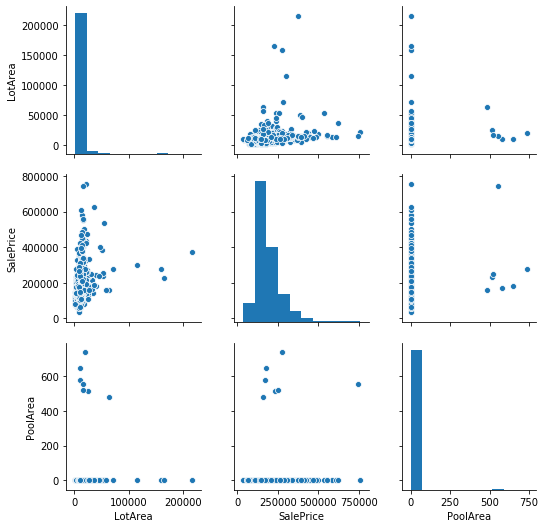

In [78]:
sns.pairplot(columns_to_pairplot);